*Finite Element Method*


In [4]:
#@title PVI para $y'(t) = -a\cdot y(t), \ \ \ y(t)=0$  Comparar Método de Euler explícito, Implícito, Crank-Nicolson

#bibl
import numpy as np
import matplotlib.pyplot as plt


def sol_exacta(a,t):
  return np.exp(-a*t)

#Método de Euler Explícito
def euler_explicito(a,y0,h,N):
  y = np.zeros(N+1)
  y[0] = y0
  for n in range(N):
    y[n+1] = (1-a*h)*y[n]
  return y

#Método Theta
def euler_implicito(a,y0,h,N,theta=0.5):
  y = np.zeros(N+1)
  y[0] = y0
  for i in range(N):
    denominador = 1 + (a*h*theta)
    numerador = 1 - (a*h*theta)
    y[i+1] = (numerador/denominador) * y[i]
  return y

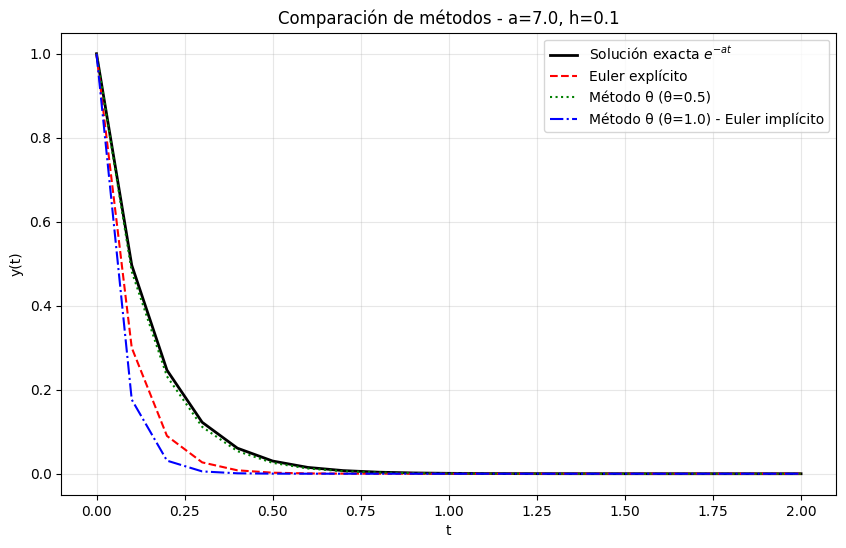


 Resultados en t_final= 2.0
Exacta  :8.315287e-07
Euler explícito. 3.486784e-11
Crank-Nicolson: 4.483238e-07
Euler implícito: 8.579198e-16

********************
Análisis de Estabilidad - a=7.0
Límite de estabilidad Euler explicito: h < 0.2857

 --->h = 0.1
Euler Explicito: Estable
Métodos implícitos (θ≥0.5): INCONDICIONALMENTE ESTABLES

 --->h = 0.2
Euler Explicito: Estable
Métodos implícitos (θ≥0.5): INCONDICIONALMENTE ESTABLES

 --->h = 0.3
Euler Explícito
Métodos implícitos (θ≥0.5): INCONDICIONALMENTE ESTABLES

 --->h = 0.5
Euler Explícito
Métodos implícitos (θ≥0.5): INCONDICIONALMENTE ESTABLES


In [5]:
#@title Demostración por comparación

def Demos_comparacion(a,h,t_max=3.0,y0=1.0):
  #Número de pasos
  N = int(np.floor(t_max/h))
  #Vector
  t = np.linspace(0,N*h, N+1)

  #Cálculo de Solucuiones
  y_exacta = sol_exacta(a,t)
  y_euler_exp = euler_explicito(a,y0,h,N)
  y_theta_05 = euler_implicito(a,y0,h,N, theta=0.5) #Crank-Nicolson
  y_theta_10 = euler_implicito(a,y0,h,N, theta=1.0) # Euler Implícito

  #Gráfico
  plt.figure(figsize=(10,6))
  plt.plot(t, y_exacta, 'k-', label='Solución exacta $e^{-at}$', linewidth=2)
  plt.plot(t, y_euler_exp, 'r--', label='Euler explícito')
  plt.plot(t, y_theta_05, 'g:', label='Método θ (θ=0.5)')
  plt.plot(t, y_theta_10, 'b-.', label='Método θ (θ=1.0) - Euler implícito')
  plt.xlabel('t')
  plt.ylabel('y(t)')
  plt.title(f'Comparación de métodos - a={a}, h={h}')
  plt.legend()
  plt.grid(True, alpha=0.3)
  plt.show()

  #Imprime Resultados
  print("\n Resultados en t_final=",t[-1])
  print(f"Exacta  :{y_exacta[-1]:0.6e}")
  print(f"Euler explícito. {y_euler_exp[-1]:0.6e}")
  print(f"Crank-Nicolson: {y_theta_05[-1]:0.6e}")
  print(f"Euler implícito: {y_theta_10[-1]:0.6e}")




def estabilidad(a,h_max=1.0):
  print(f"\n{'*'*20}")
  print(f"Análisis de Estabilidad - a={a}")

  #Límite de estabilidad de Euler
  h_limite = 2/a
  print(f"Límite de estabilidad Euler explicito: h < {h_limite:0.4f}")
  #Diferentes valores
  h_valores = [0.1,0.2,0.3,0.5]

  for h in h_valores:
    print(f"\n --->h = {h}")
    if h < h_limite:
      print(f"Euler Explicito: Estable")
    else:
      print(f"Euler Explícito")
    print(f"Métodos implícitos (θ≥0.5): INCONDICIONALMENTE ESTABLES")


a = 7.0
Demos_comparacion(a, h=0.1, t_max=2.0)
estabilidad(a)

